<a href="https://colab.research.google.com/github/Divyanagsupritha/Traffic-Surveillance-for-Helmet-and-License-Plate-Recognition/blob/main/Traffic_Surveillance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Nov 10 13:11:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 22.7 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CQ222ounm1agOZYGOB1L")
project = rf.workspace("akankshai").project("helmet-and-license-plate-detector")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-and-License-Plate-Detector-1 in yolov11:: 100%|██████████| 1742/1742 [00:00<00:00, 6998.24it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset.location

'/content/Helmet-and-License-Plate-Detector-1'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=60 imgsz=860

100% 5.35M/5.35M [00:00<00:00, 93.1MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Helmet-and-License-Plate-Detector-1/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=860, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

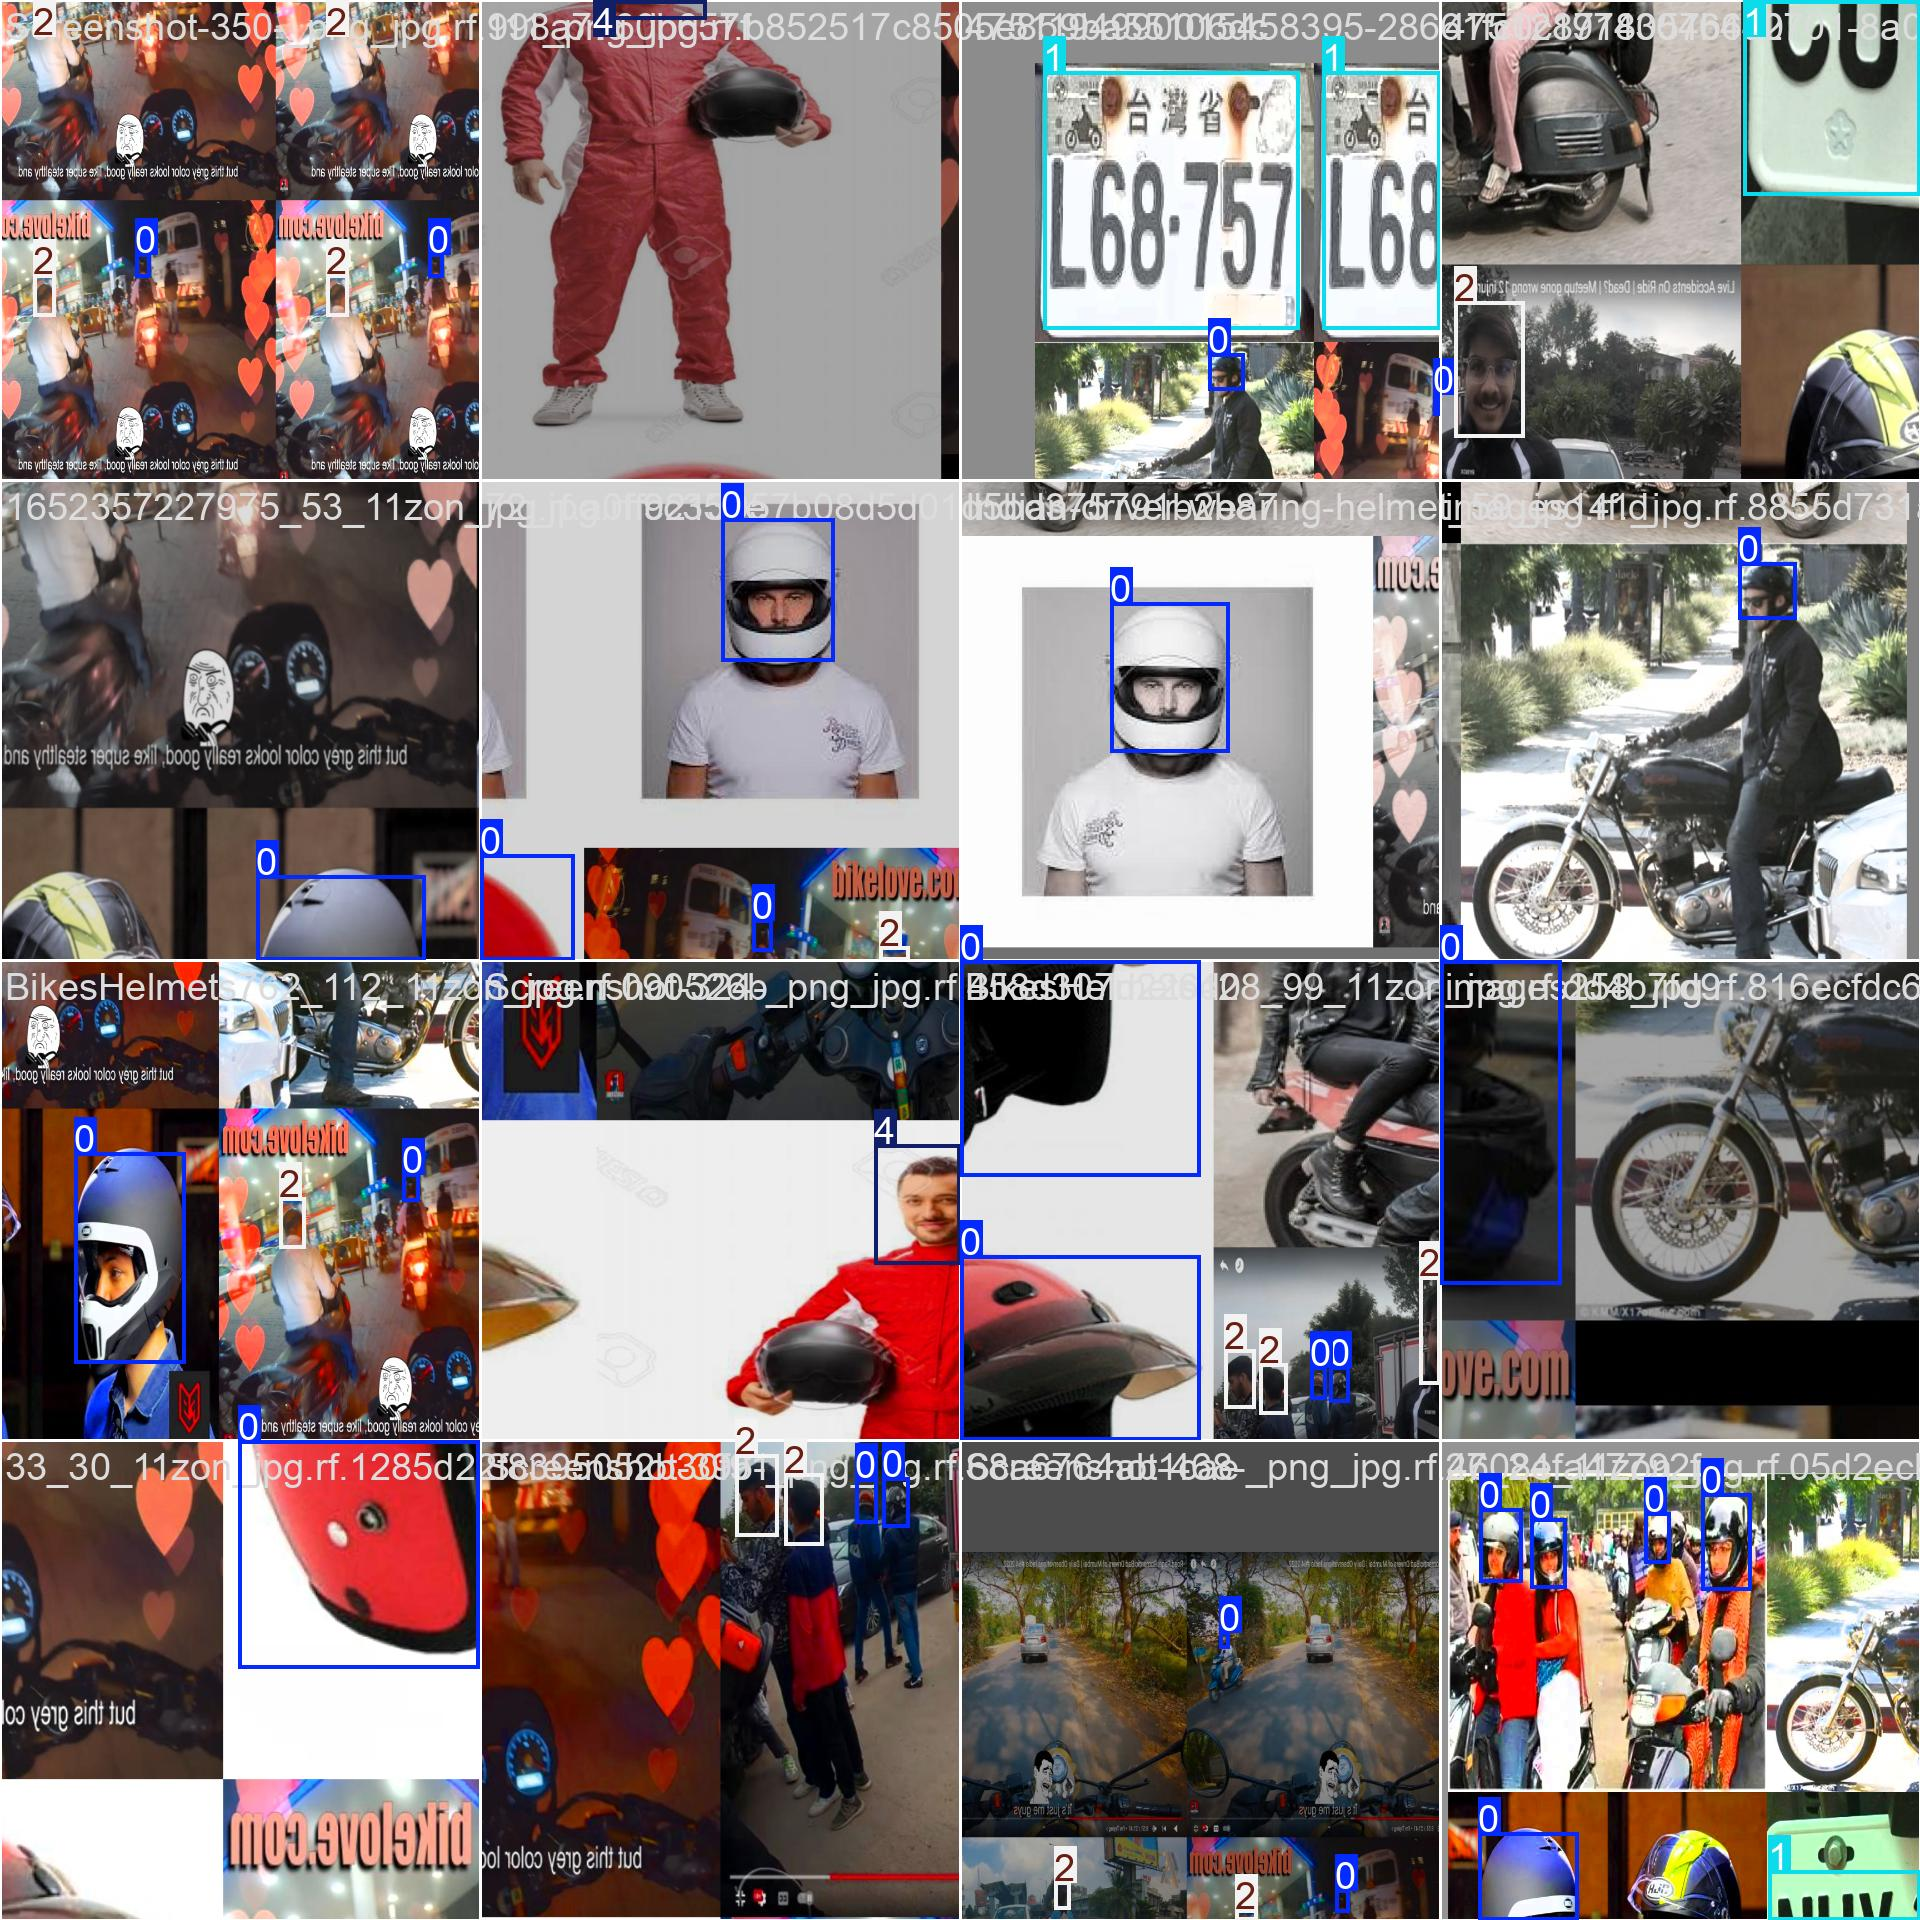

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

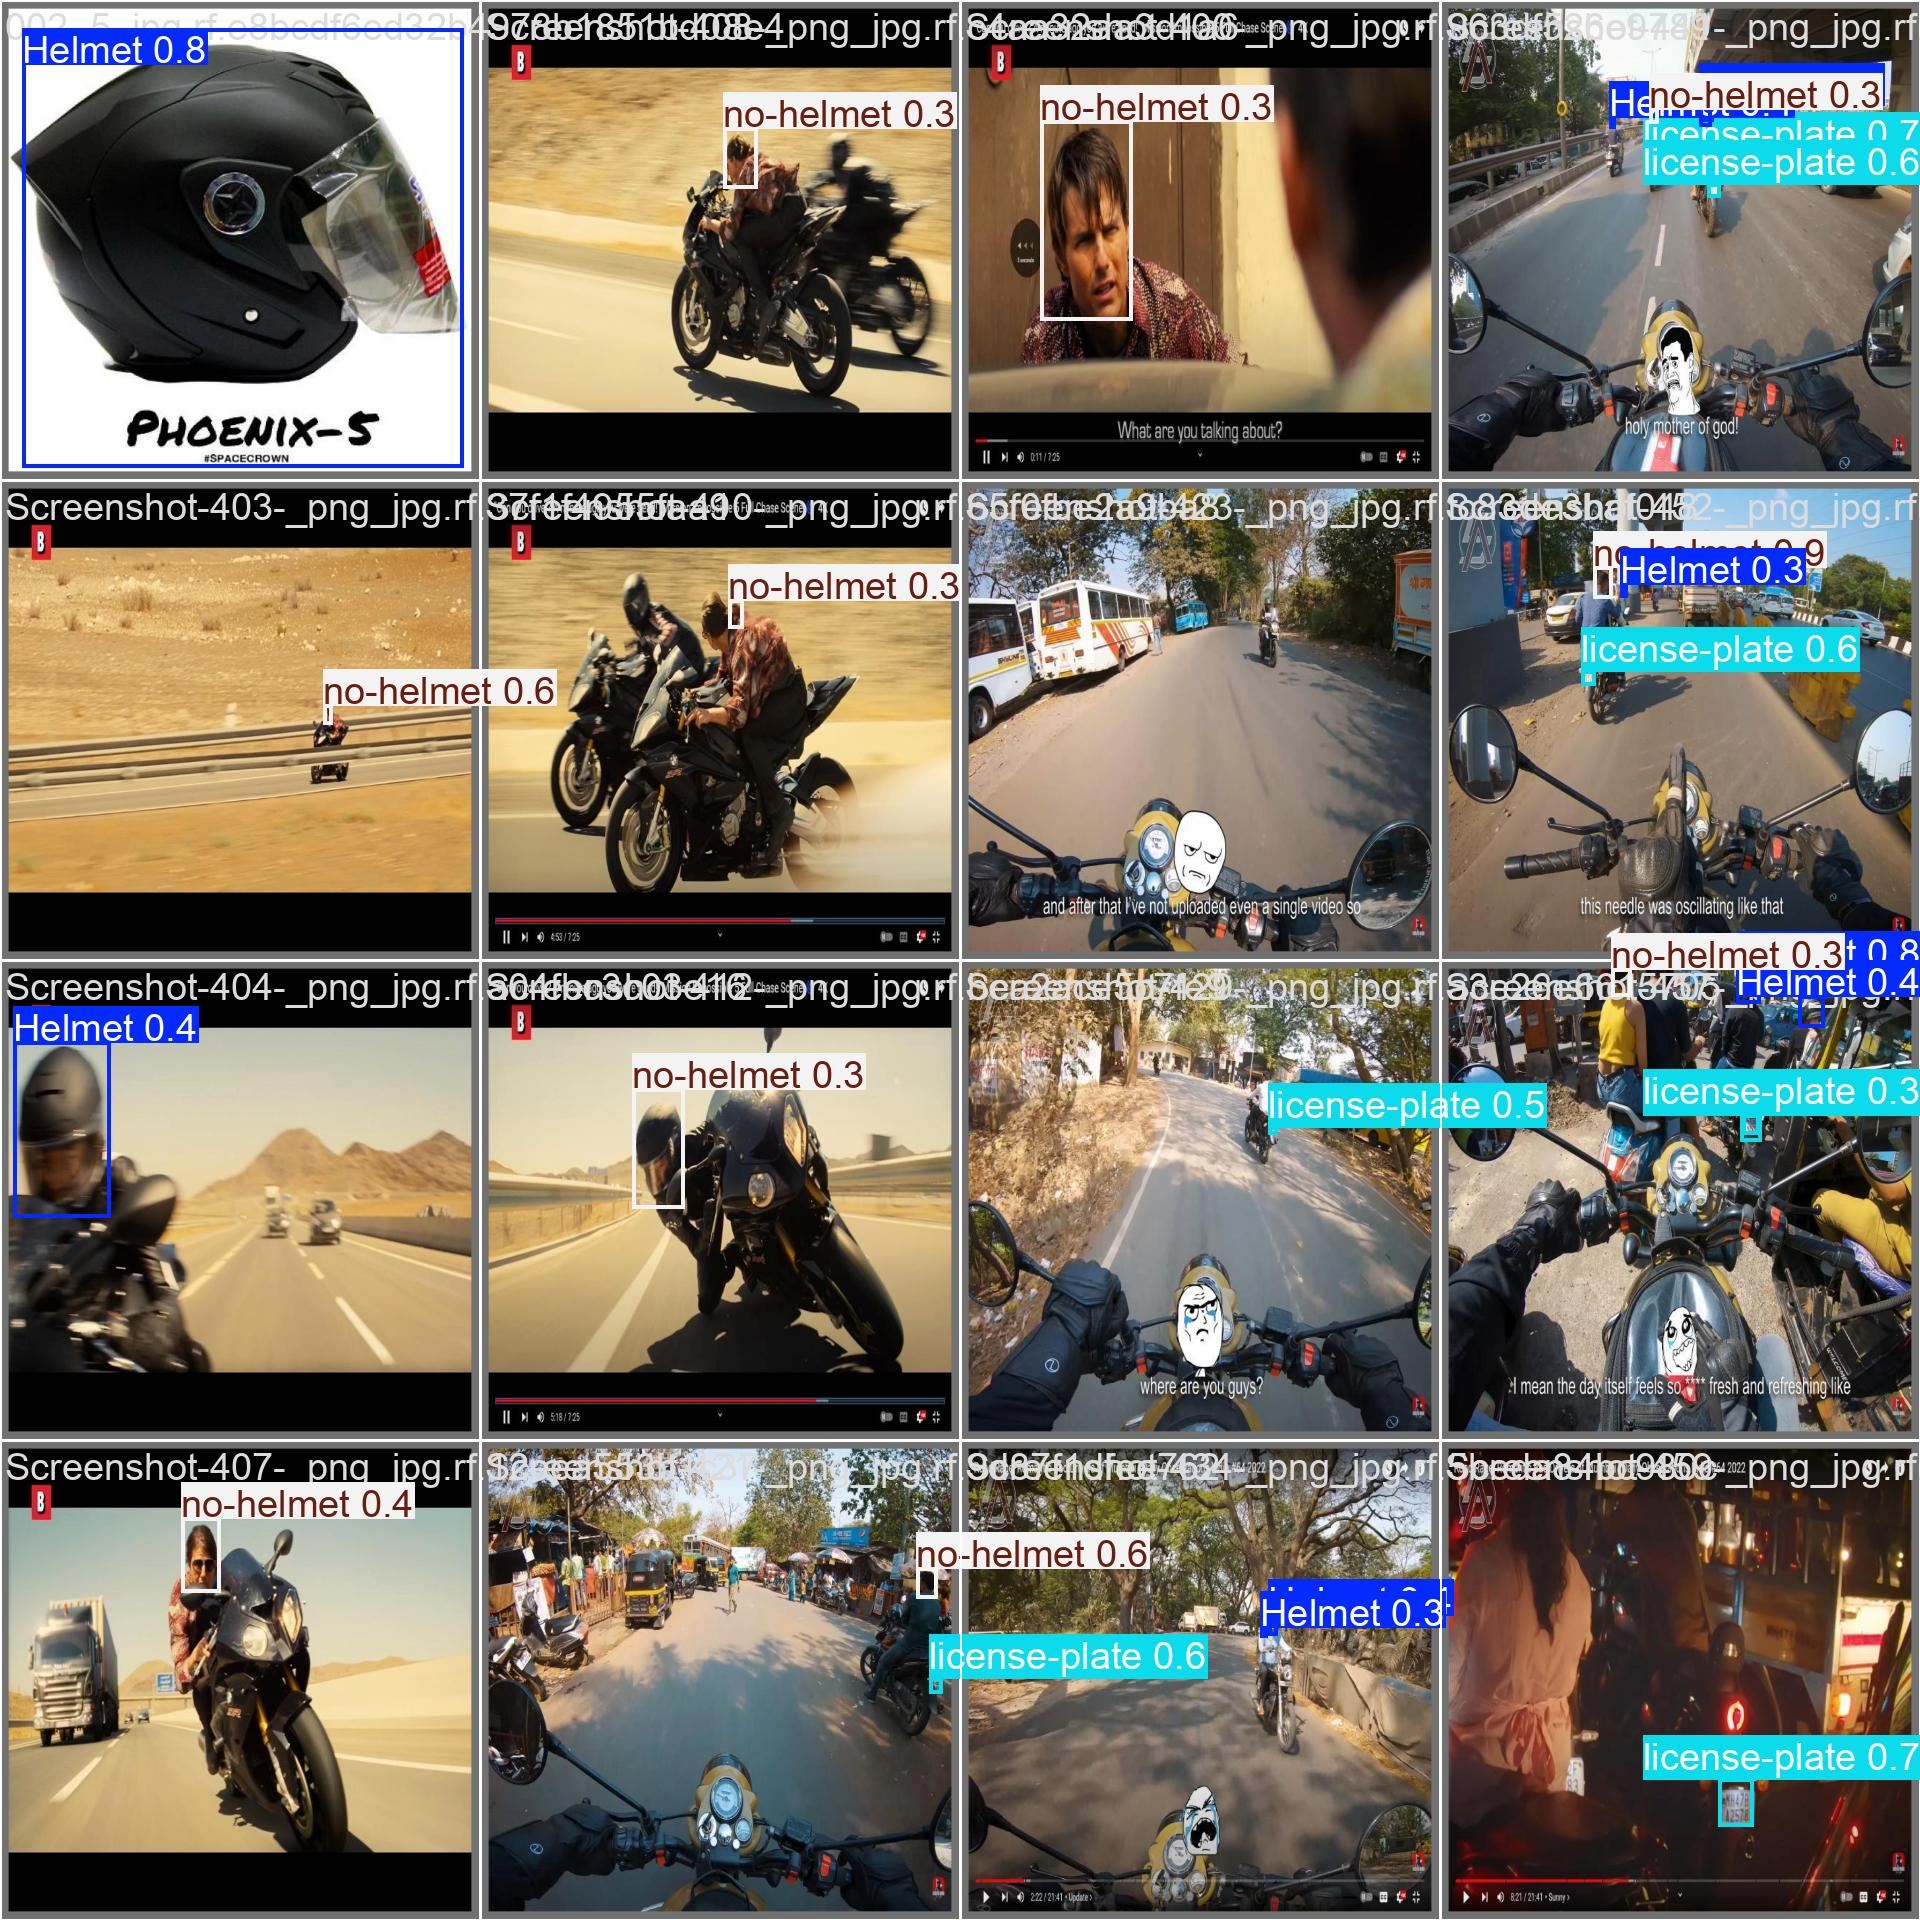

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

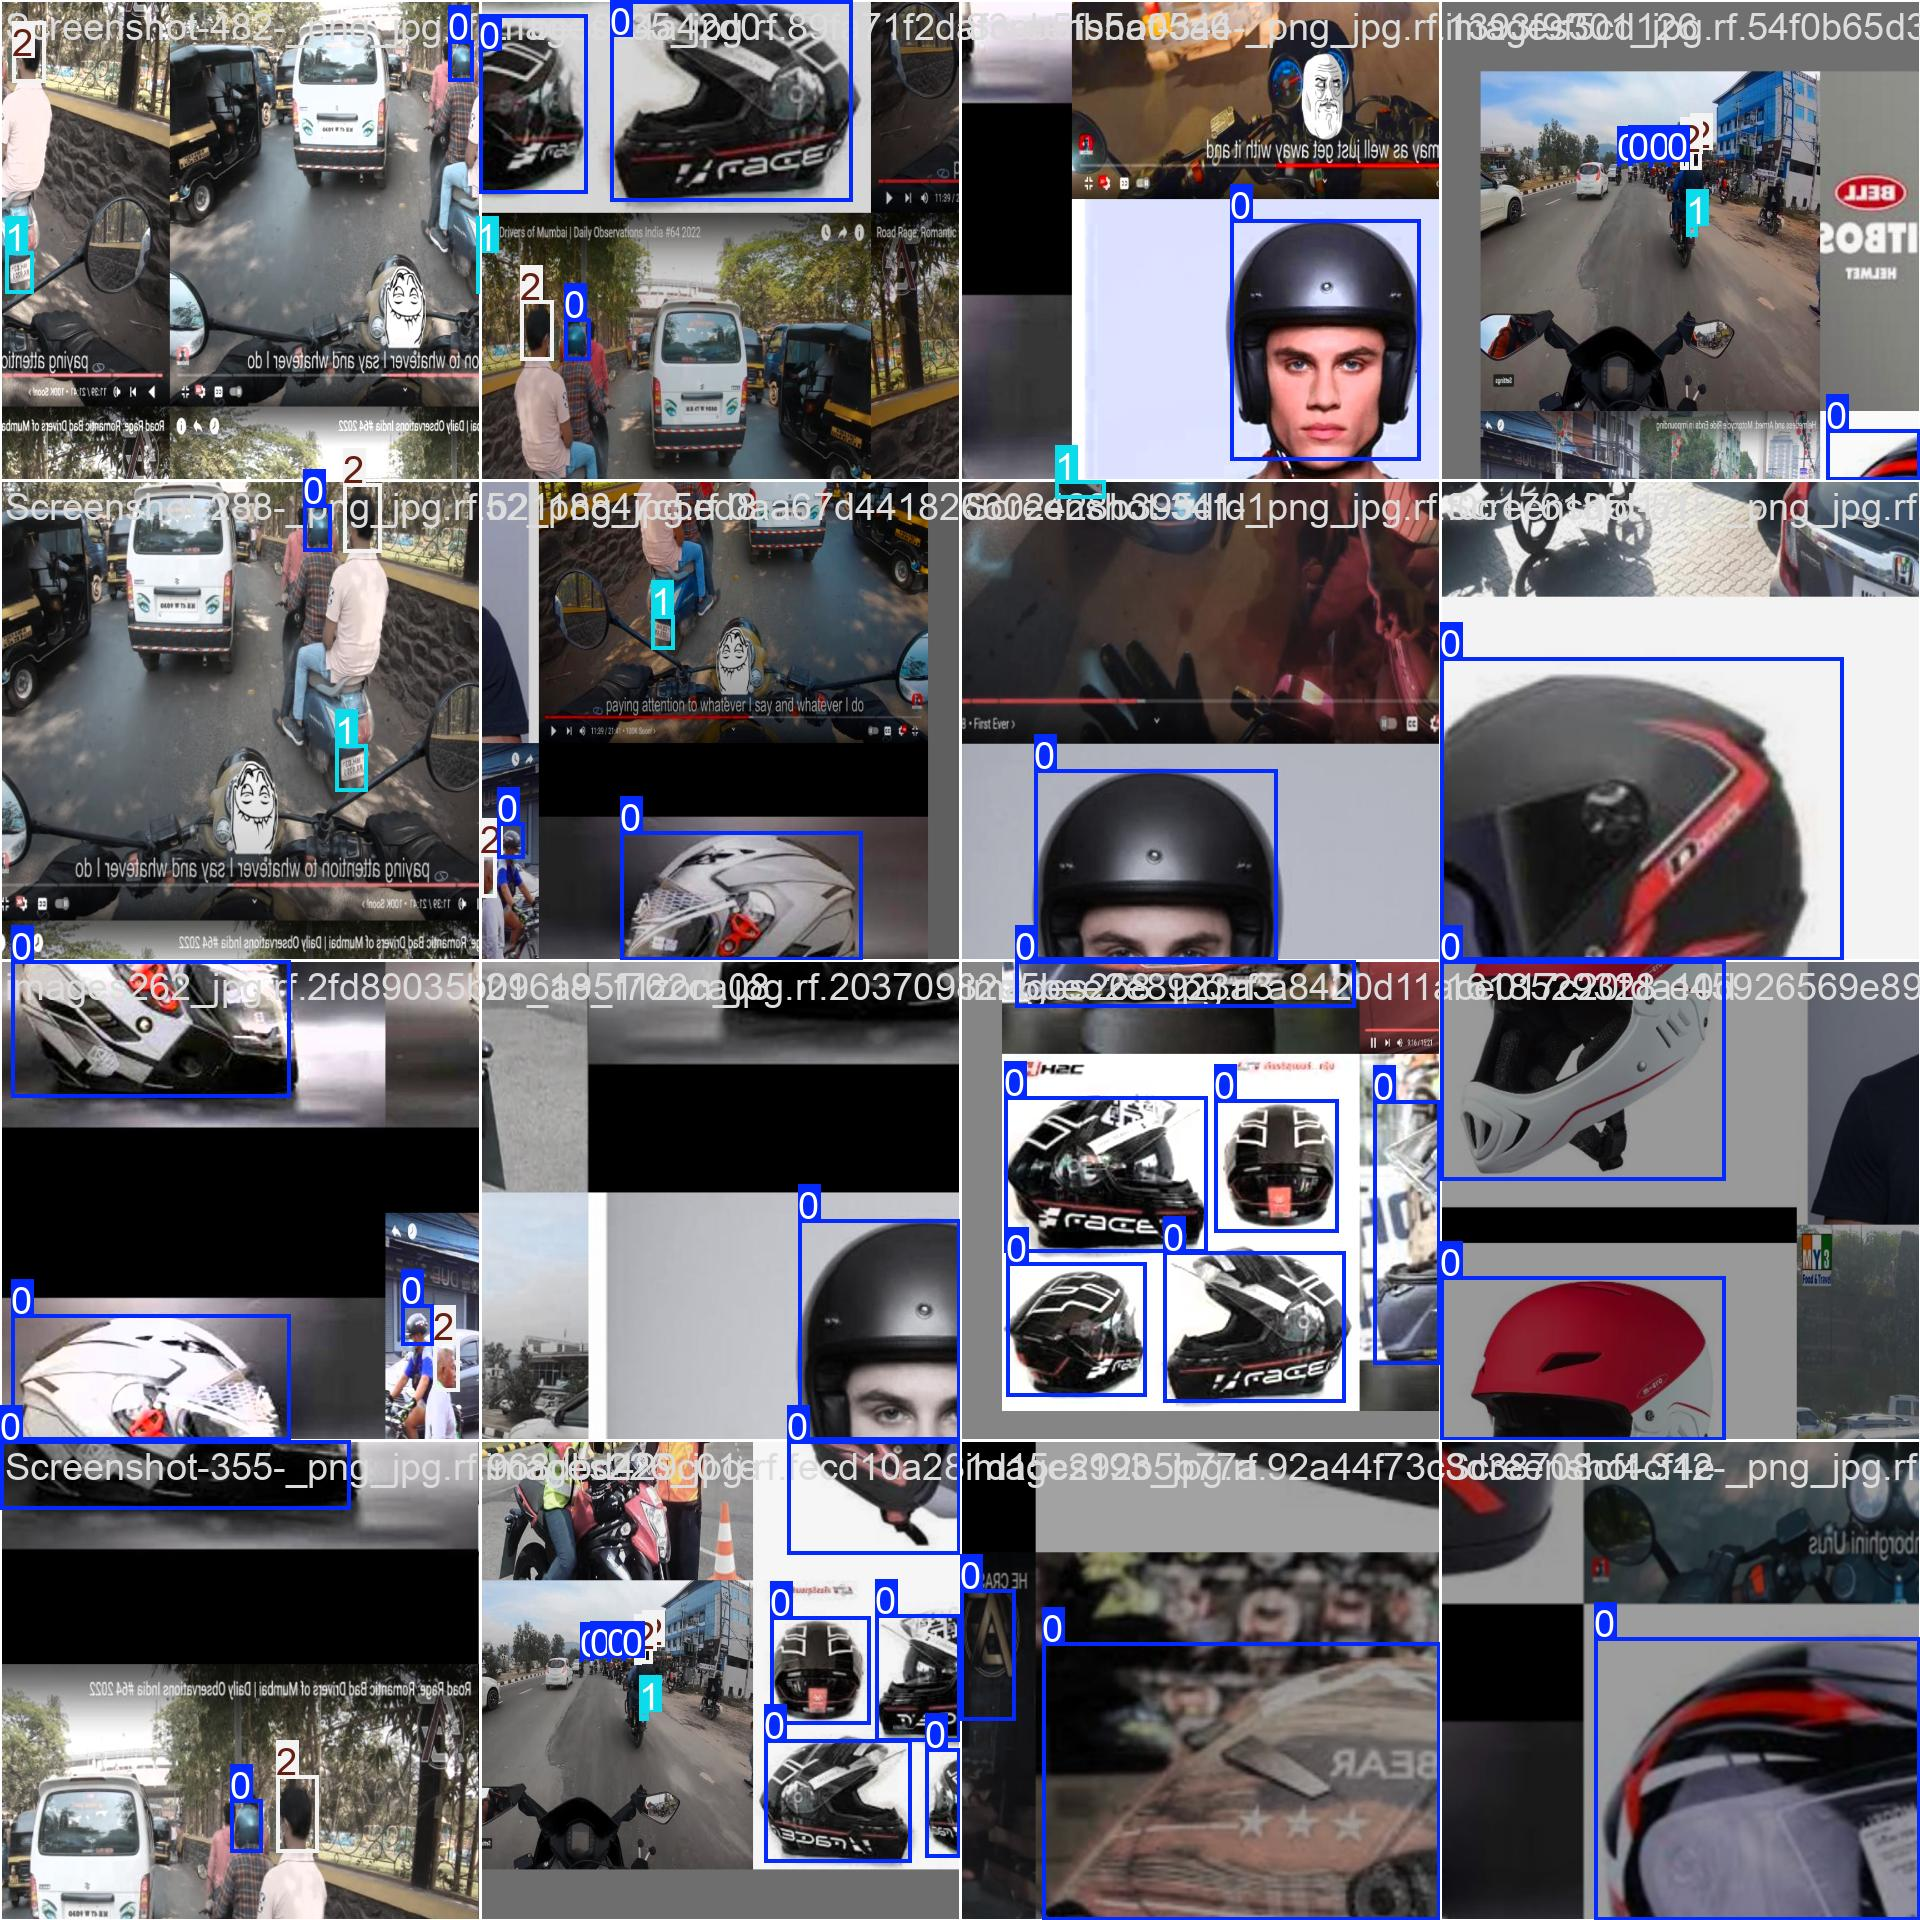

In [ ]:
Image("/content/runs/detect/train/train_batch1.jpg", width=600)

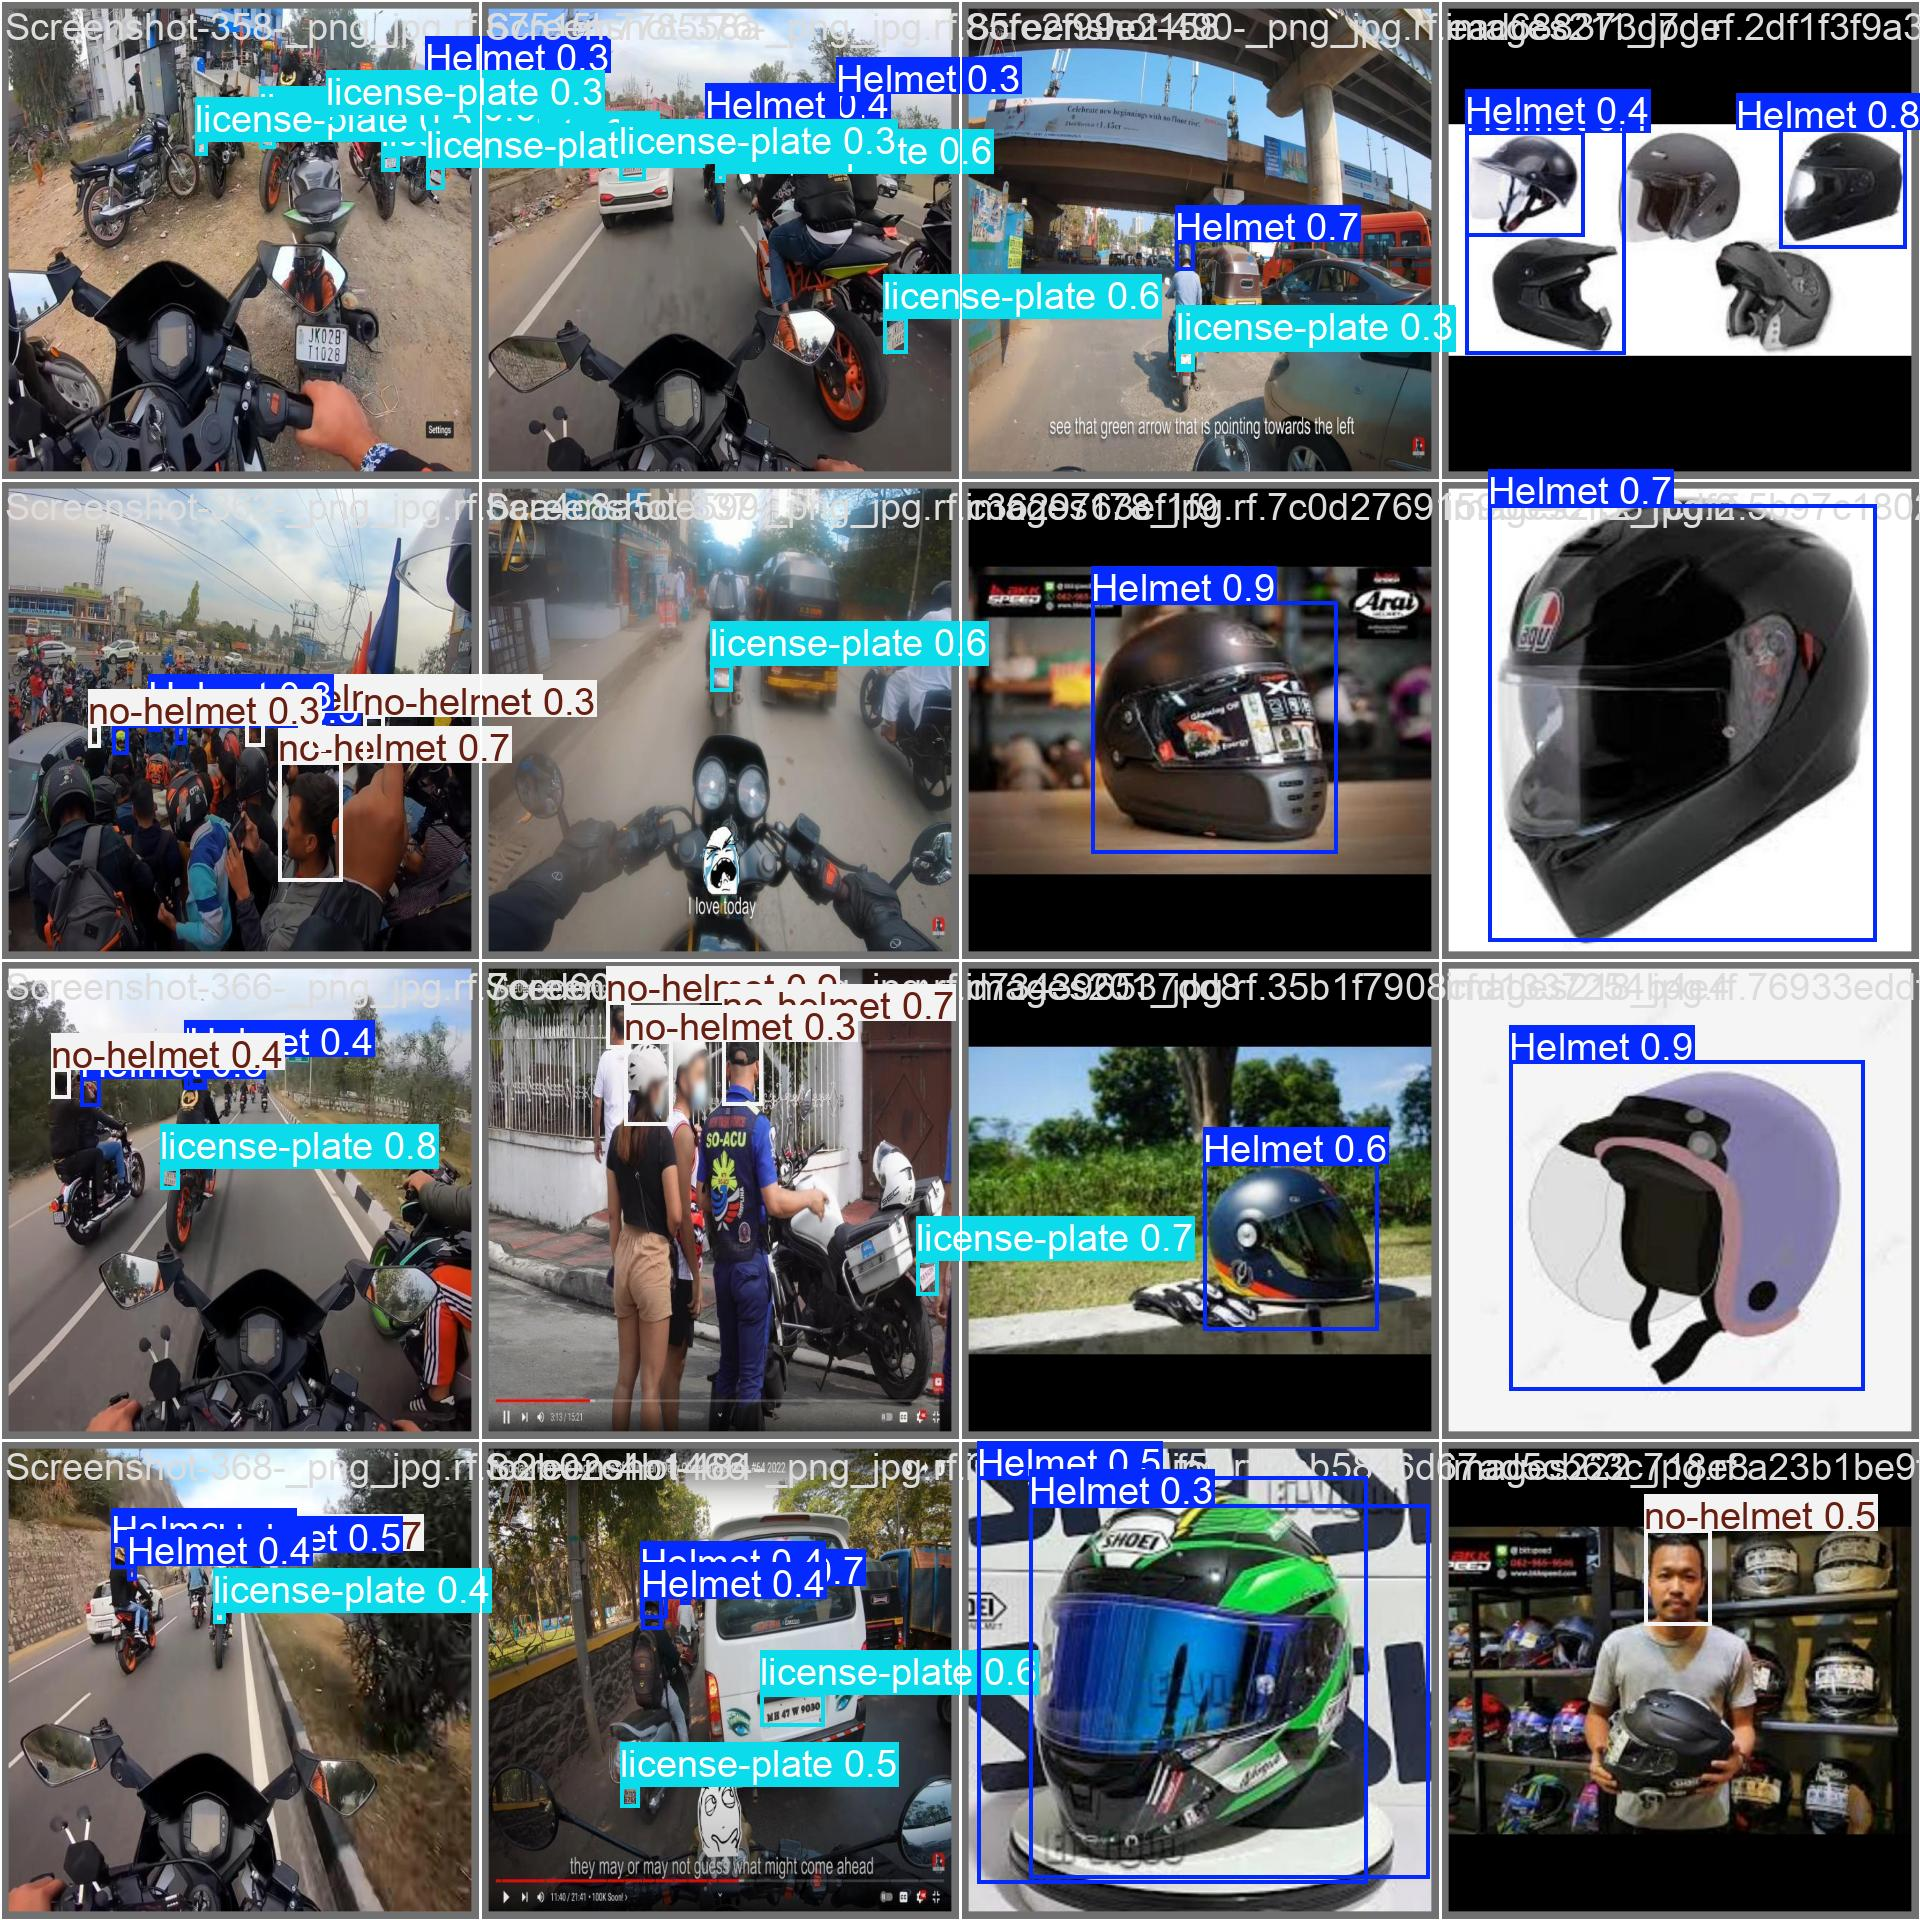

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Helmet-and-License-Plate-Detector-1/valid/labels.cache... 159 images, 1 backgrounds, 0 corrupt: 100% 159/159 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 80, len(boxes) = 432. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:04<00:00,  2.18it/s]
                   all        159        432      0.641      0.483      0.551      0.351
                Helmet        114        255      0.685      0.504      0.563      0.335
         license-plate         62         84      0.641      0.655      0.683      0.403
             no-helmet

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/86 /content/Helmet-and-License-Plate-Detector-1/test/images/43_jpg.rf.c065c52340655a223e2f9f39abf45bd2.jpg: 864x864 13 Helmets, 16.7ms
image 2/86 /content/Helmet-and-License-Plate-Detector-1/test/images/4751194990015458395-482b6e293083dc4c8f94f5627aaf52fa-22051707_jpg.rf.7415e08ce56d961291164a070c543a13.jpg: 864x864 1 license-plate, 11.8ms
image 3/86 /content/Helmet-and-License-Plate-Detector-1/test/images/4751194990015458395-488368a7bb92cd64260afc2ba8ca76ab-22051708_jpg.rf.6018b4a91fb5fcbca659393697f29598.jpg: 864x864 1 license-plate, 11.8ms
image 4/86 /content/Helmet-and-License-Plate-Detector-1/test/images/4751194990015458395-4e7321ffd53816b338bc2358a803e16e-22051708_jpg.rf.fce3a90a73ba266ec28bc04d50cee0fd.jpg: 864x864 1 license-plate, 11.8ms
image 5/86 /content/Helmet-and-License-Plate-Detector-1/test/images/47

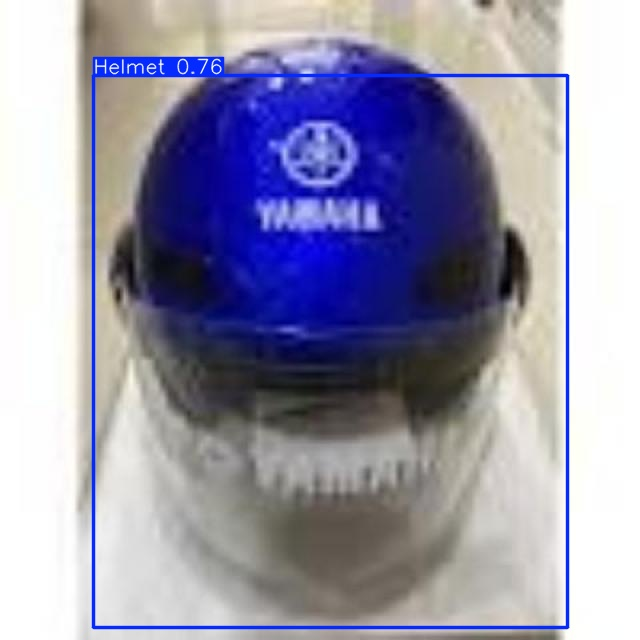

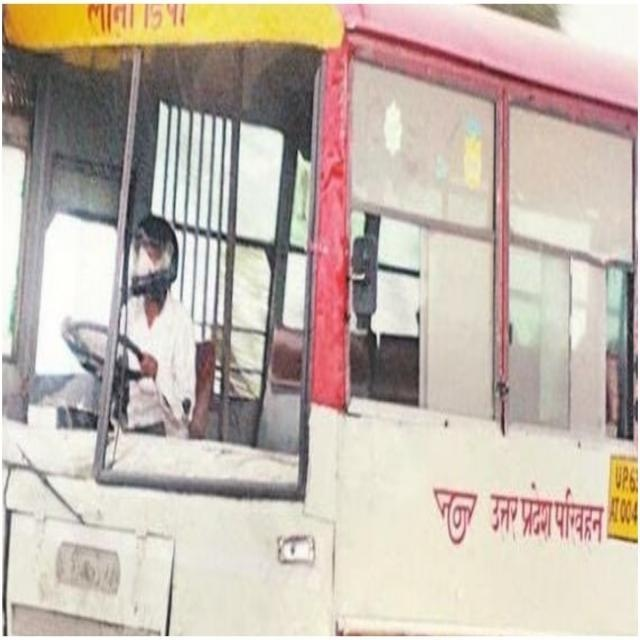

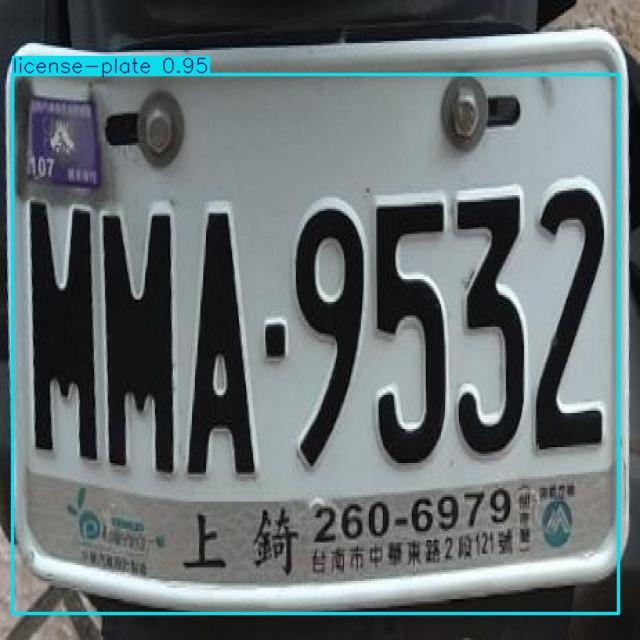

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
  display(IPyImage(filename=img, width=600))
  print("\n")

In [ ]:
!gdown "https://www.shutterstock.com/image-photo/new-delhi-indiaaug-22-2021-600nw-2029559297.jpg"

Downloading...
From: https://www.shutterstock.com/image-photo/new-delhi-indiaaug-22-2021-600nw-2029559297.jpg
To: /content/new-delhi-indiaaug-22-2021-600nw-2029559297.jpg
100% 76.9k/76.9k [00:00<00:00, 8.73MB/s]


In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=helmet.jpg save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/helmet.jpg: 544x864 5 Helmets, 1 no-helmet, 84.7ms
Speed: 9.3ms preprocess, 84.7ms inference, 1453.3ms postprocess per image at shape (1, 3, 544, 864)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


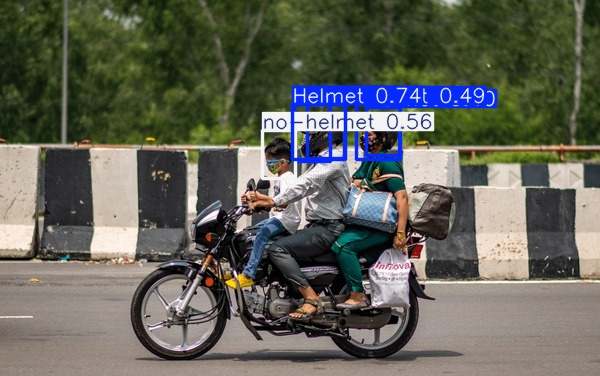

In [ ]:
Image("/content/runs/detect/predict2/helmet.jpg", width=600)

In [ ]:
!gdown "https://i0.wp.com/blog.martinbelan.com/wp-content/uploads/2015/01/India_Motorcycle_20130809_0003.jpg"

Downloading...
From: https://i0.wp.com/blog.martinbelan.com/wp-content/uploads/2015/01/India_Motorcycle_20130809_0003.jpg
To: /content/India_Motorcycle_20130809_0003.jpg
100% 317k/317k [00:00<00:00, 3.04MB/s]


In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=helmet2.jpg save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/helmet2.jpg: 640x864 1 license-plate, 4 no-helmets, 41.6ms
Speed: 5.5ms preprocess, 41.6ms inference, 655.7ms postprocess per image at shape (1, 3, 640, 864)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


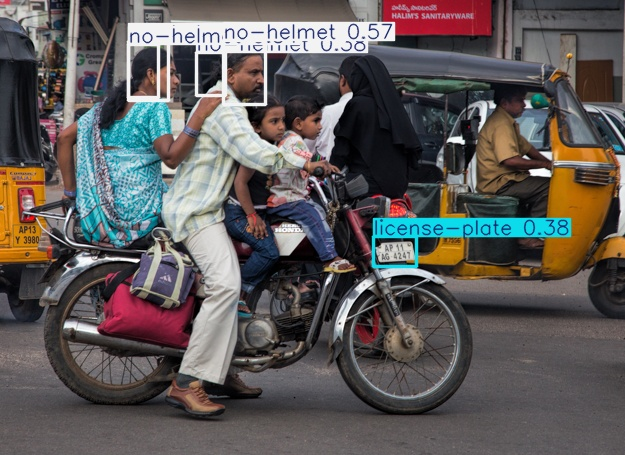

In [ ]:
Image("/content/runs/detect/predict3/helmet2.jpg", width=600)

In [ ]:
!gdown "https://c8.alamy.com/comp/ABPJR8/rsc78958-indian-family-husband-wife-son-on-one-bike-ABPJR8.jpg"

Downloading...
From: https://c8.alamy.com/comp/ABPJR8/rsc78958-indian-family-husband-wife-son-on-one-bike-ABPJR8.jpg
To: /content/rsc78958-indian-family-husband-wife-son-on-one-bike-ABPJR8.jpg
130kB [00:00, 7.58MB/s]


In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=helmet3.jpg save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/helmet3.jpg: 640x864 1 Helmet, 2 license-plates, 45.0ms
Speed: 6.5ms preprocess, 45.0ms inference, 634.5ms postprocess per image at shape (1, 3, 640, 864)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


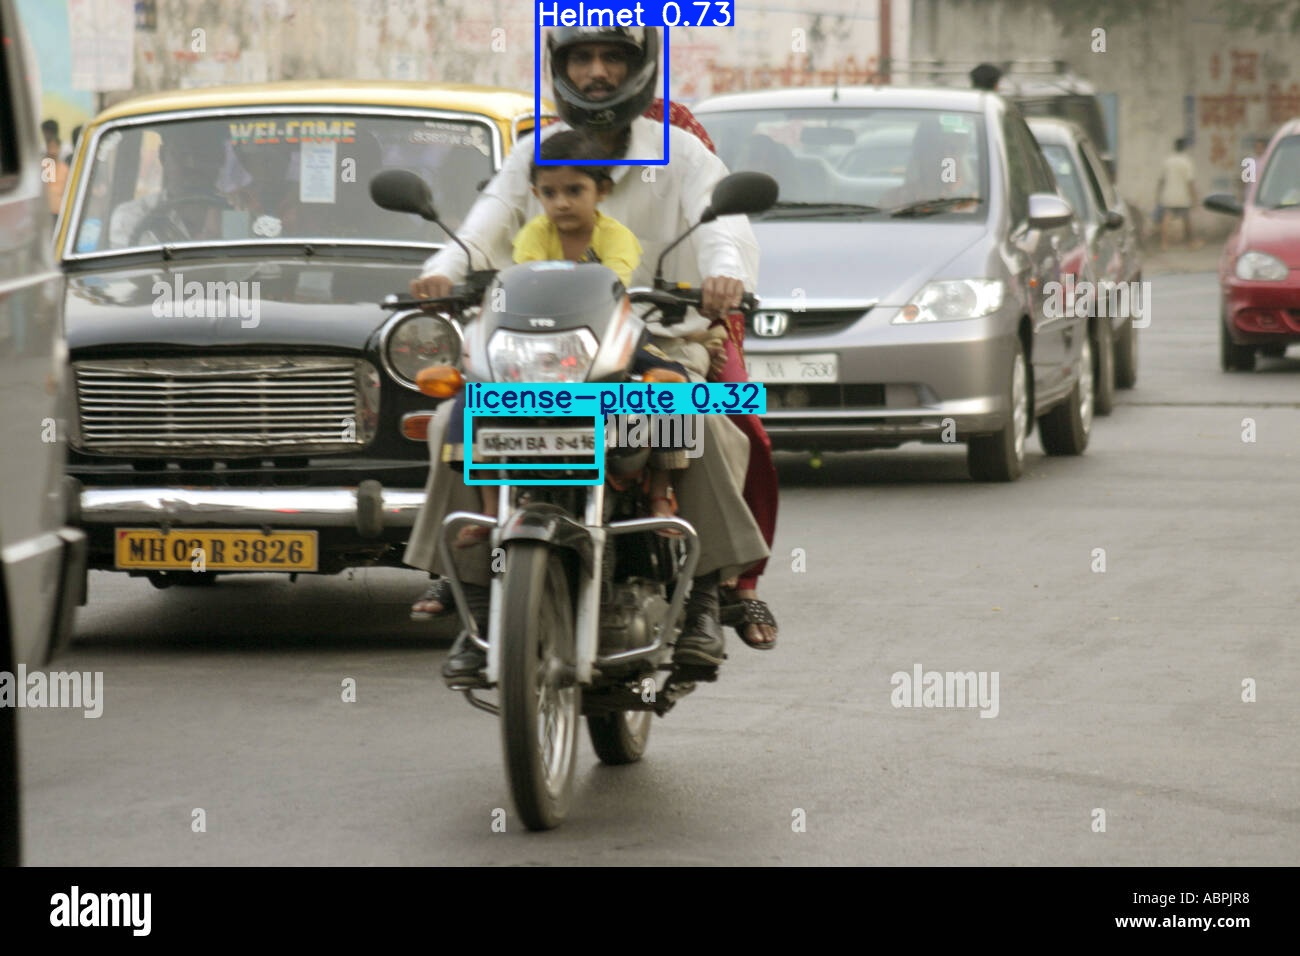

In [ ]:
Image("/content/runs/detect/predict6/helmet3.jpg", width=600)

In [ ]:
!gdown "https://images.news9live.com/wp-content/uploads/2024/02/New-Project-3.jpg"

Downloading...
From: https://i.tribune.com.pk/media/images/1524602-Helmet-1507310206/1524602-Helmet-1507310206-436x333.JPG
To: /content/1524602-Helmet-1507310206-436x333.JPG
100% 62.0k/62.0k [00:00<00:00, 10.3MB/s]


In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=helmet4.jpg save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/helmet4.jpg: 672x864 2 Helmets, 42.3ms
Speed: 6.7ms preprocess, 42.3ms inference, 605.8ms postprocess per image at shape (1, 3, 672, 864)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


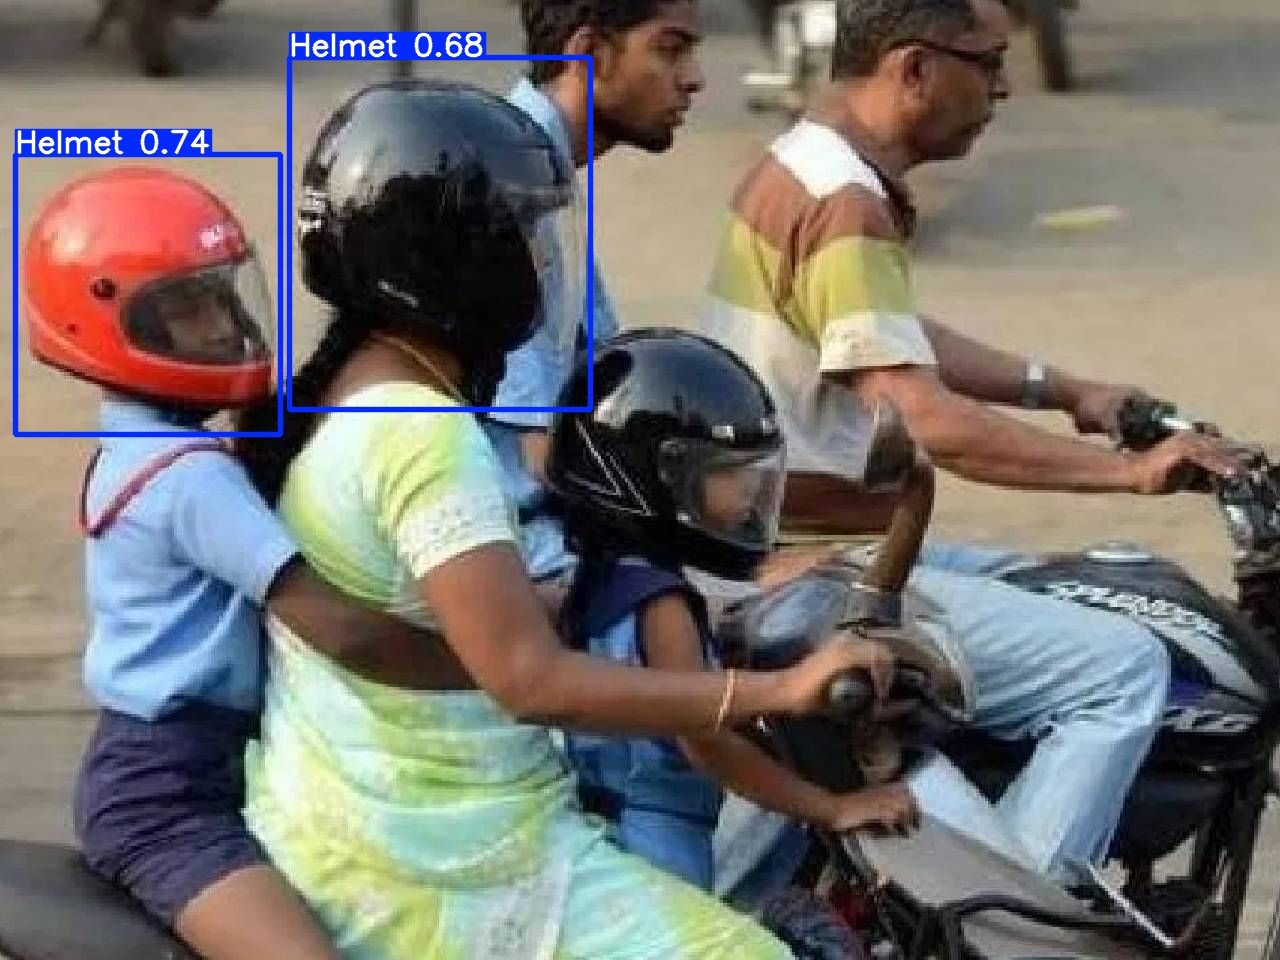

In [ ]:
Image("/content/runs/detect/predict7/helmet4.jpg", width=600)

In [ ]:
!gdown "https://i.tribune.com.pk/media/images/1524602-Helmet-1507310206/1524602-Helmet-1507310206-436x333.JPG"

Downloading...
From: https://i.tribune.com.pk/media/images/1524602-Helmet-1507310206/1524602-Helmet-1507310206-436x333.JPG
To: /content/1524602-Helmet-1507310206-436x333.JPG
100% 34.4k/34.4k [00:00<00:00, 52.7MB/s]


In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=helmet5.JPG save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/helmet5.JPG: 672x864 5 Helmets, 2 no-helmets, 46.3ms
Speed: 8.0ms preprocess, 46.3ms inference, 595.4ms postprocess per image at shape (1, 3, 672, 864)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


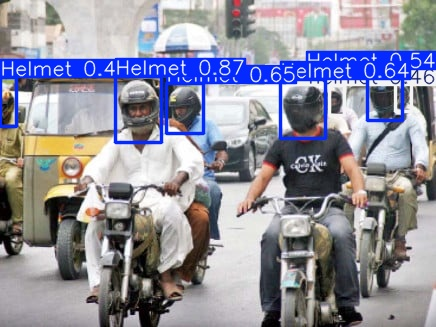

In [ ]:
Image("/content/runs/detect/predict8/helmet5.jpg", width=600)

In [ ]:
!gdown "https://static.toiimg.com/thumb/msid-61906209,width-400,height-225,resizemode-72/61906209.jpg"

Downloading...
From: https://static.toiimg.com/thumb/msid-61906209,width-400,height-225,resizemode-72/61906209.jpg
To: /content/61906209.jpg
14.9kB [00:00, 68.1MB/s]


In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=helmet6.jpg save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/helmet6.jpg: 512x864 3 Helmets, 1 license-plate, 1 no-helmet, 49.4ms
Speed: 5.2ms preprocess, 49.4ms inference, 631.5ms postprocess per image at shape (1, 3, 512, 864)
Results saved to runs/detect/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict


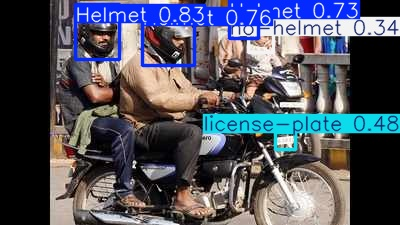

In [ ]:
Image("/content/runs/detect/predict9/helmet6.jpg", width=600)